In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [ ]:
def membership_low(x):
    if x <= 20:
        return 0
    elif 20 < x <= 25:
        return (x - 20) / 5
    elif 25 < x <= 35:
        return 1
    elif 35 < x <= 40:
        return (40 - x) / 5
    else:
        return 0

def membership_med(x):
    if x <= 30:
        return 0
    elif 30 < x <= 42:
        return (x - 30) / 12
    elif 42 < x <= 55:
        return 1
    elif 55 < x <= 80:
        return (80 - x) / 25
    else:
        return 0

# T-norm
def min_tnorm(a, b):
    return min(a, b)

def algebraic_product_tnorm(a, b):
    return a * b

def bounded_product_tnorm(a, b):
    return max(0, a + b - 1)

def drastic_product_tnorm(a, b):
    if a == 1:
        return b
    elif b == 1:
        return a
    else:
        return 0

# S-norm
def max_snorm(a, b):
    return max(a, b)

def algebraic_sum_snorm(a, b):
    return a + b - (a * b)

def bounded_sum_snorm(a, b):
    return min(1, a + b)

def drastic_sum_snorm(a, b):
    if a == 0:
        return b
    elif b == 0:
        return a
    else:
        return 1


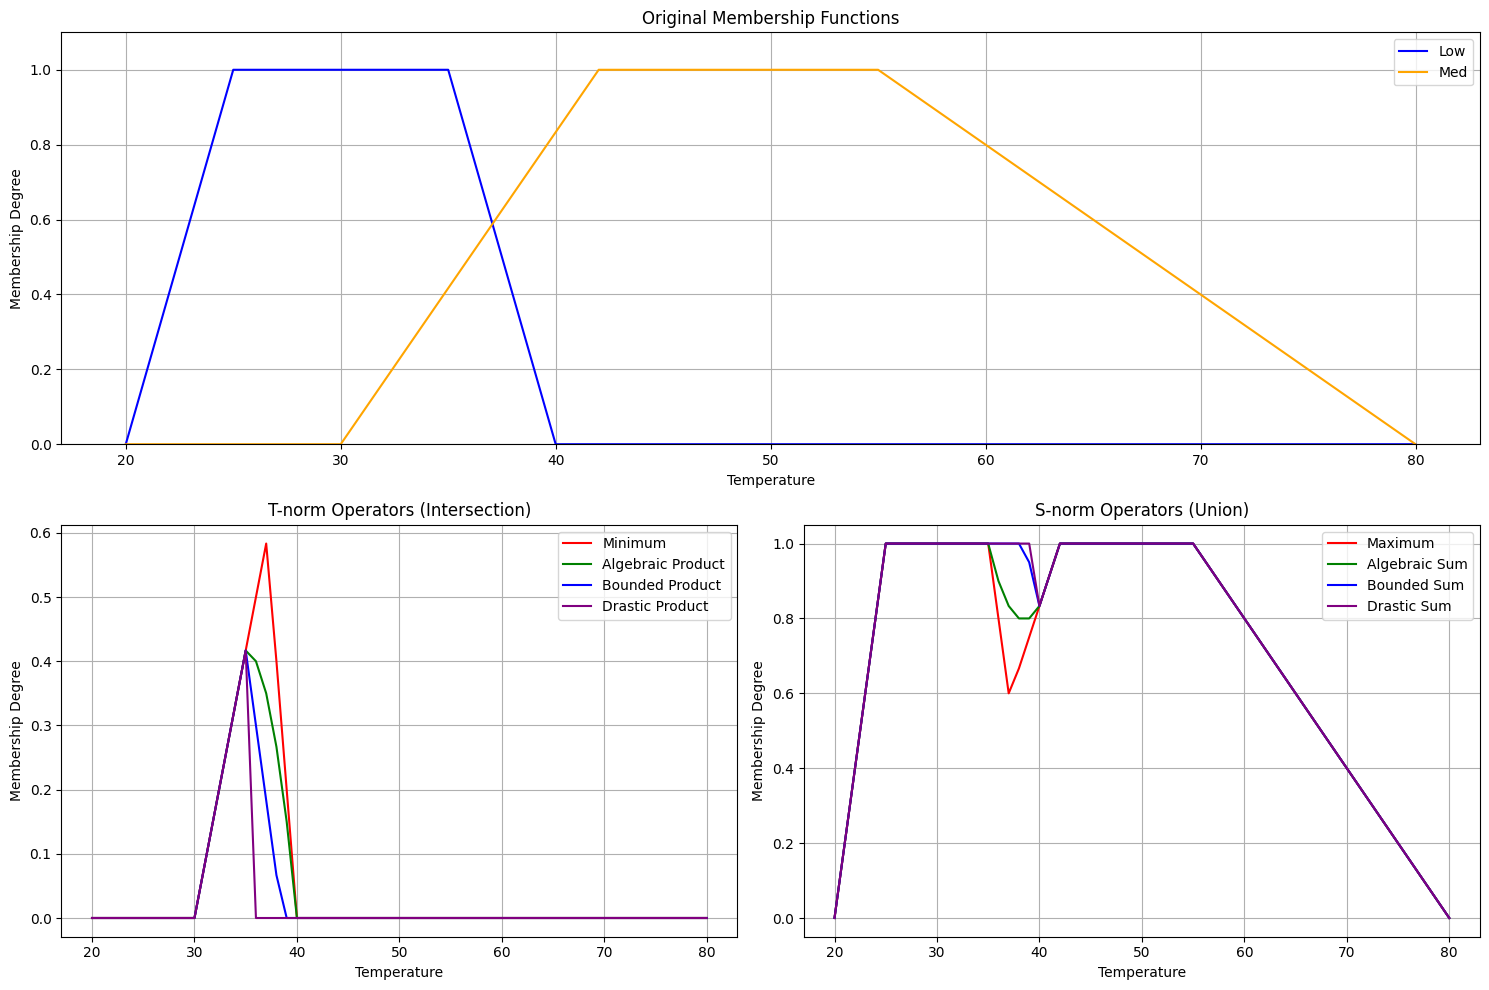

In [ ]:
universe = np.arange(20, 81, 1)

# membership values
low_vals = [membership_low(x) for x in universe]
med_vals = [membership_med(x) for x in universe]

plt.figure(figsize=(15, 10))
gs = GridSpec(2, 2, figure=plt.gcf())

# Original Membership Functions
ax1 = plt.subplot(gs[0, :])
ax1.plot(universe, low_vals, 'b-', label='Low')
ax1.plot(universe, med_vals, 'orange', label='Med')
ax1.set_title('Original Membership Functions')
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Membership Degree')
ax1.grid(True)
ax1.set_ylim(0, 1.1)
ax1.legend()

# T-norm
ax2 = plt.subplot(gs[1, 0])
min_intersection = [min_tnorm(low_vals[i], med_vals[i]) for i in range(len(universe))]
algebraic_product_intersection = [algebraic_product_tnorm(low_vals[i], med_vals[i]) for i in range(len(universe))]
bounded_product_intersection = [bounded_product_tnorm(low_vals[i], med_vals[i]) for i in range(len(universe))]
drastic_product_intersection = [drastic_product_tnorm(low_vals[i], med_vals[i]) for i in range(len(universe))]

ax2.plot(universe, min_intersection, 'r-', label='Minimum')
ax2.plot(universe, algebraic_product_intersection, 'g-', label='Algebraic Product')
ax2.plot(universe, bounded_product_intersection, 'b-', label='Bounded Product')
ax2.plot(universe, drastic_product_intersection, 'purple', label='Drastic Product')
ax2.set_title('T-norm Operators (Intersection)')
ax2.set_xlabel('Temperature')
ax2.set_ylabel('Membership Degree')
ax2.grid(True)
ax2.legend()

# S-norm
ax3 = plt.subplot(gs[1, 1])
max_union = [max_snorm(low_vals[i], med_vals[i]) for i in range(len(universe))]
algebraic_sum_union = [algebraic_sum_snorm(low_vals[i], med_vals[i]) for i in range(len(universe))]
bounded_sum_union = [bounded_sum_snorm(low_vals[i], med_vals[i]) for i in range(len(universe))]
drastic_sum_union = [drastic_sum_snorm(low_vals[i], med_vals[i]) for i in range(len(universe))]

ax3.plot(universe, max_union, 'r-', label='Maximum')
ax3.plot(universe, algebraic_sum_union, 'g-', label='Algebraic Sum')
ax3.plot(universe, bounded_sum_union, 'b-', label='Bounded Sum')
ax3.plot(universe, drastic_sum_union, 'purple', label='Drastic Sum')
ax3.set_title('S-norm Operators (Union)')
ax3.set_xlabel('Temperature')
ax3.set_ylabel('Membership Degree')
ax3.grid(True)
ax3.legend()

plt.tight_layout()
plt.show()